In [1]:
import csv
import string
import pandas as pd
import matplotlib.pyplot as plt
import nltk
from nltk.corpus import stopwords 
from nltk.tokenize import word_tokenize



In [2]:
#Put all file name in a list.
File_name=['bbchealth','cbchealth','cnnhealth','everydayhealth','foxnewshealth','gdnhealthcare','goodhealth','KaiserHealthNews'
,'latimeshealth','msnhealthnews','NBChealth','nprhealth','nytimeshealth','reuters_health','usnewshealth','wsjhealth']

#Create a list to store all text.
all_text =[]

In [3]:
all_text.clear()
#Divided 4 kinds of type to process the files

for name in File_name:
    if name == 'gdnhealthcare' or name ==  'goodhealth' or name == 'KaiserHealthNews':
        #Set the dlimiter as "|"
        path ="datasets/"+name+".csv"
        data = pd.read_csv(path,delimiter="|",header=None,encoding='cp1252')
        #clean http urls
        test =data[1].str.split('http',expand=True)
        #spllit sentence
        test =test[0].str.split(' ',expand=True)
        
        test=test.values
        for i in test.flatten():
        # remove None and ''
            if i != None and i !='' :
                all_text.append(str(i).lower())
        
        
          
    elif name =='everydayhealth' or name =='latimeshealth' or name =='nprhealth' or name =='reuters_health' or name =='usnewshealth':
        #Set the dlimiter as "|"
        path ="datasets/"+name+".csv"
        data = pd.read_csv(path,delimiter="|",header=None)
        #clean http urls
        test =data[2].str.split('http',expand=True)
        #spllit sentence
        test =test[0].str.split(' ',expand=True)
        
        test=test.values
        for i in test.flatten():
        # remove None and ''
            if i != None and i !='' :
                all_text.append(str(i).lower())
                
                
                
    elif name == 'nytimeshealth':
        #Set the dlimiter as "|"
        path ="datasets/"+name+".csv"
        data = pd.read_csv(path,delimiter="|",header=None)
        #clean http urls
        test =data[1].str.split('http',expand=True)
        #spllit sentence
        test =test[0].str.split(' ',expand=True)
        
        test=test.values
        for i in test.flatten():
        # remove None and ''
            if i != None and i !='' :
                all_text.append(str(i).lower())
                
                               
    else:
        #Set the dlimiter as "|"
        path ="datasets/"+name+".csv"
        data = pd.read_csv(path,delimiter="|",header=None,encoding='cp1252')
        #clean http urls
        test =data[2].str.split('http',expand=True)
        #spllit sentence
        test =test[0].str.split(' ',expand=True)
        
        test=test.values
        for i in test.flatten():
        # remove None and ''
            if i != None and i !='' :
                all_text.append(str(i).lower())





In [4]:
#set stop words
stop_words = set(stopwords.words('english')) 

filtered_sentence = [] 

#remove stop words
for w in all_text: 
    if w not in stop_words: 
        filtered_sentence.append(w) 
        
from collections import Counter
word_count = Counter(filtered_sentence)
word_count.most_common(20)

[('rt', 7930),
 ('health', 5149),
 ('ebola', 4175),
 ('new', 3588),
 ('may', 3104),
 ('study', 2952),
 ('us', 2582),
 ('cancer', 2240),
 ('says', 2223),
 ('get', 1857),
 ('help', 1662),
 ('care', 1634),
 ('well', 1557),
 ('risk', 1538),
 ('drug', 1486),
 ('patients', 1365),
 ('nhs', 1268),
 ('could', 1179),
 ('heart', 1175),
 ('kids', 1154)]

In [5]:
#Delete RT because it means retweet.
del word_count['rt']


top_ten = word_count.most_common(10)
top_ten
        

[('health', 5149),
 ('ebola', 4175),
 ('new', 3588),
 ('may', 3104),
 ('study', 2952),
 ('us', 2582),
 ('cancer', 2240),
 ('says', 2223),
 ('get', 1857),
 ('help', 1662)]

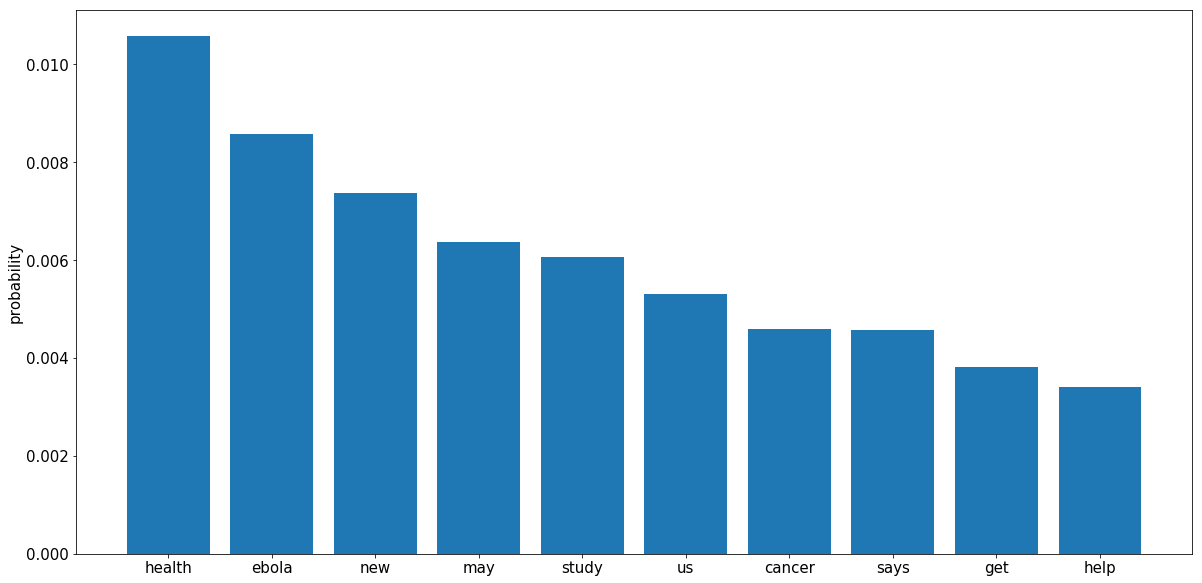

In [6]:
xData=[]
yData=[]

for word, count in top_ten:
    xData.append(word)
    yData.append(count)
    

#Calculate the probability
new_yData = [i/sum(word_count.values()) for i in yData]

xindex = [1,2,3,4,5,6,7,8,9,10]
plt.figure(figsize=(20,10))
plt.ylabel('probability',fontsize = 15)
plt.bar(xindex, new_yData, align='center')
plt.xticks(xindex, xData)
plt.xticks(fontsize = 15)
plt.yticks(fontsize = 15)
plt.show()